In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd

<h2>Заргрузка исходных данных</h2>

In [3]:
report = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/report_pickle')
data = pd.read_pickle('/Users/popov/Documents/Python/Pybursa/Web/data_pickle')

In [4]:
offset = MonthEnd()
curr_month = report.index[-1]
prev_month, next_month = curr_month - offset, curr_month + offset

<h3>Отчётный месяц</h3>

In [5]:
'{:%B %Y}'.format(curr_month)

'June 2018'

<h2>Основная таблица</h2>

In [6]:
rep_2017 = report['2017':] # данные за 2017 год
rep_2017

channels                            goals                       
             yandex google go.mail.ru  bry cpc order basket contact measure
2017-01-31     2949   3084        375  511   0     4    243     355       8
2017-02-28     2701   2414        282  486   0     8    197     311      14
2017-03-31     2590   2283        284  426   0    11    157     298      11
2017-04-30     1890   2390        243  395   0    10    123     260      31
2017-05-31     2006   2584        110  389   0     4    106     221      29
2017-06-30     2048   2164        154  407   0     7    137     182      24
2017-07-31     2218   2172        147  316   0     4     81     221      16
2017-08-31     1995   1892         98  191   0     1     67     197      31
2017-09-30     1767   1596         62  123   0    10    100     151      16
2017-10-31     2027   2004         58   35   0     8     84     193      14
2017-11-30     1930   1669         54   11   0     2     85     183      15
2017-12-31     2375   2035         45   11   0     2     89     110      11
2018-01-31     2477   1881         32    5   0     1     74     136      12
2018-02-28     2527   1625         44    7   0     3    121     130      16
2018-03-31     2568   1997         51    6   0    10     79     197      12
2018-04-30     2359   2410         74    5   0     1     56     129       9
2018-05-31     2166   2355         65    4   0     1     42     131      12
2018-06-30     2361   2369         32    3   0     7     64     150      17

<h3>Разница между отчетным и предшествующим месяцами</h3>

In [7]:
rep_diff = report.diff(periods=1) # разница от месяца к месяцу
rep_diff[curr_month:].astype(int) # разница между предыдущим и отчетным месяцами

channels                           goals                       
             yandex google go.mail.ru bry cpc order basket contact measure
2018-06-30      195     14        -33  -1   0     6     22      19       5

<h2>Графики</h2>
<h3>Столбчатая диаграмма соотношения каналов трафика</h3>

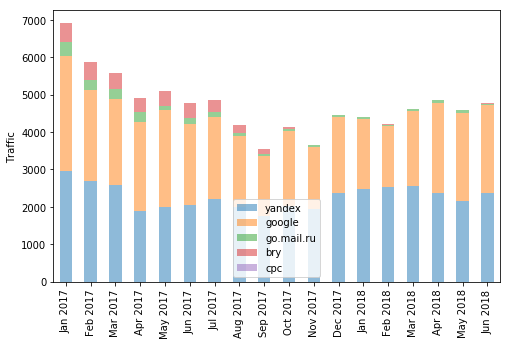

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1, 1, 1)
rep_2017.channels.plot(ax=ax, kind='bar', stacked=True, alpha=0.5);
ax.set_ylabel('Traffic');
ax.legend(loc='lower center');
#fig.autofmt_xdate()
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in rep_2017.index]);

<h3>Линейная диаграмма изменений трафика</h3>

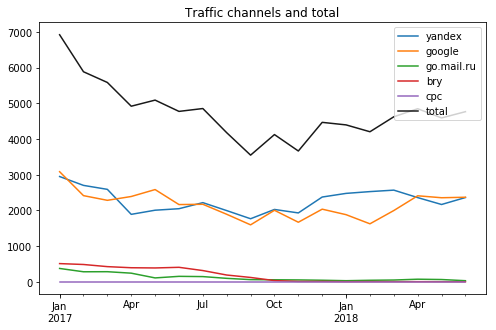

In [9]:
fig = plt.figure(figsize=(8,5));
ax = fig.add_subplot(111);
rep_2017.channels.plot(ax=ax);
rep_2017.channels.sum(axis=1).plot(color=(0,0,0), linewidth=1.5, alpha=.9, label='total');
ax.set_title('Traffic channels and total')
ax.legend(loc='upper right');

<h2>Табличные данные</h2>
<h3>Ключевые слова и количество визитов</h3>

In [10]:
kw = 'keyword visit'.split()

In [11]:
data.visit = data.visit.astype(int)
data[kw]

keyword  visit
bing       0                                                np - /      1
           1     np - /?cnt=catalog&r=1266&yclid=34721923026413...      1
go.mail.ru 0                                             (not set)     32
google     0                                         дешевые двери    305
           1                                          двери дешево    260
           2                                       двери из дерева    201
           3                             np - /?cnt=catalog&r=2438    152
           4                                      np - /?pid=pokaz     96
           5                             np - /?cnt=catalog&r=1428     85
           6                                                np - /     68
           7                                         двери продажа     53
           8                                     полотно для двери     17
           9                               np - /?pid=menu-katalog     10
           10                               дверное полотно дешево     10
           11                               дверные полотна купить      9
           12                             np - /?cnt=catalog&r=473      6
           13                                        двери полотно      6
           14                                     двери с коробкой      6
           15                                            (not set)      5
           16                            np - /?cnt=catalog&r=2966      5
           17                                      полотна дверные      5
           18                                        полотно двери      5
           19                            np - /?cnt=catalog&r=3124      4
           20                              np - /?cnt=catalog&r=57      4
           21                             np - /?cnt=catalog&r=615      4
           22           np - /?pid=derevyannye-mezhkomnatnye-dveri      4
           23                            np - /?cnt=catalog&r=1010      3
           24                            np - /?cnt=catalog&r=1435      3
           25                            np - /?cnt=catalog&r=2078      3
           26                             np - /?cnt=catalog&r=999      3
...                                                            ...    ...
yandex     2020  дверное полотно belwooddoors франческо шпон ор...      1
           2021                             дверное полотно can go      1
           2022      дверное полотно candler выбеленный дуб купить      1
           2023                               дверное полотно elly      1
           2024                 дверное полотно enamel classic 235      1
           2025                 дверное полотно enamel classic 236      1
           2026                      дверное полотно estet decor 1      1
           2027                            дверное полотно evoline      1
           2028                     дверное полотно g7 содружество      1
           2029  дверное полотно ghizzie+ benatti boston 4 купи...      1
           2030  дверное полотно ghizzie+ benatti classic vetro...      1
           2031  дверное полотно ghizzie+ benatti d2a ciesa куп...      1
           2032                     дверное полотно giubileo 80 cr      1
           2033                              дверное полотно helly      1
           2034                    дверное полотно helly шпон дуба      1
           2035                дверное полотно helly шпон дуба j n      1
           2036                дверное полотно helly шпон дуба оби      1
           2037                        дверное полотно k7+ двернов      1
           2038       дверное полотно profildoors профильдорс x 17      1
           2039                        дверное полотно ps 15 венге      1
           2040      дверное полотно psk 2 c тонированным зеркалом      1
           2041                 дверное полотно quattro n20 сонома      1
           2042              дверное полотно ravenna 1030id куп

<h3>Самые популярные ключевые слова по каждой поисковой системе</h3>

In [12]:
data[kw].xs(0, level=1)

,keyword,visit
bing,np - /,1
go.mail.ru,(not set),32
google,дешевые двери,305
yahoo,np - /,1
yandex,(not set),116


<h3>Топ-5 запросов по каждой поисковой системе</h3>

In [13]:
data_grupped = data.sort_values('visit', ascending=False).groupby(level=0, axis=0) # группировка по поисковой системе
data_top5 = data_grupped[['keyword', 'visit']].apply(lambda x: x.iloc[:5]) # топ-5 каждой ПС
data_top5.reset_index(level=0).drop('level_0', axis=1)

keyword  visit
bing       0                                              np - /      1
           1   np - /?cnt=catalog&r=1266&yclid=34721923026413...      1
go.mail.ru 0                                           (not set)     32
google     0                                       дешевые двери    305
           1                                        двери дешево    260
           2                                     двери из дерева    201
           3                           np - /?cnt=catalog&r=2438    152
           4                                    np - /?pid=pokaz     96
yahoo      0                                              np - /      1
yandex     0                                           (not set)    116
           10                                    дверное полотно     17
           12                    дверное полотно 800х2000 купить     11
           11                                     двери на кухню     11
           13                             дверное полотно купить      8